# 6.2 Exploring relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     a. Correlations
     b. Scatterplots
     c. Pair Plots
     d. Categorical Plots
#### 4. Hypothesis 

### 1. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#check matplotlib version
matplotlib.__version__

'3.5.2'

In [3]:
# This option ensures charts creatde are displayed in the notebook without the need to "call" them specifically.
%matplotlib inline

In [4]:
# Path
path = r"C:\Users\Natalia\Documents\World University Rank"

In [6]:
# Import dataset
df = pd.read_pickle(os.path.join(path,'03 Scripts', '1', 'Time_list.pkl'))

### 2. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2594 non-null   float64
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2367 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(7), int64(1), object(6)
memor

In [7]:
df.shape

(2603, 14)

In [8]:
df.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,"7,929",8.4,27%,45:55:00,2011


In [9]:
df.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students               object
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [10]:
# Check for missing values

df.isnull().sum() # No missing values

world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
female_male_ratio          236
year                         0
dtype: int64

In [11]:
# Find duplicates

df_dups = df[df.duplicated()]

In [12]:
df_dups.shape # No duplicates!

(0, 14)

In [13]:
for col in df.columns.tolist():
      weird = (df[[col]].applymap(type) != df[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df[weird]) > 0:
        print (col)

num_students
international_students
female_male_ratio


### 3. Exploring Relationships

#### a. Correlations

In [14]:
# Create a correlation matrix using pandas
df.corr()

,teaching,international,research,citations,income,total_score,student_staff_ratio,year
teaching,1.000000,0.137834,0.913120,0.503867,0.328457,0.894085,-0.282630,-0.278108
international,0.137834,1.000000,0.251146,0.325030,0.011053,0.123829,0.053899,-0.050160
research,0.913120,0.251146,1.000000,0.525264,0.381564,0.904166,-0.198841,-0.274451
citations,0.503867,0.325030,0.525264,1.000000,0.045876,0.546015,-0.137737,-0.173544
income,0.328457,0.011053,0.381564,0.045876,1.000000,0.226557,-0.020805,-0.029956
total_score,0.894085,0.123829,0.904166,0.546015,0.226557,1.000000,-0.255692,0.037239
student_staff_ratio,-0.282630,0.053899,-0.198841,-0.137737,-0.020805,-0.255692,1.000000,0.060728
year,-0.278108,-0.050160,-0.274451,-0.173544,-0.029956,0.037239,0.060728,1.000000


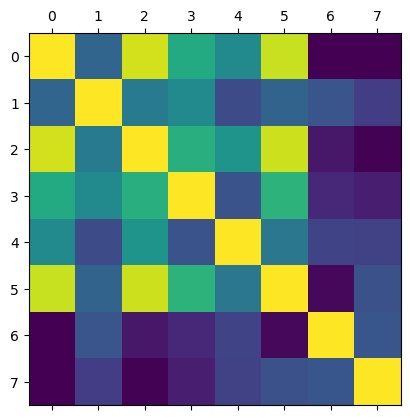

In [15]:
# Create a correlation heatmap using matplotlib

plt.matshow(df.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

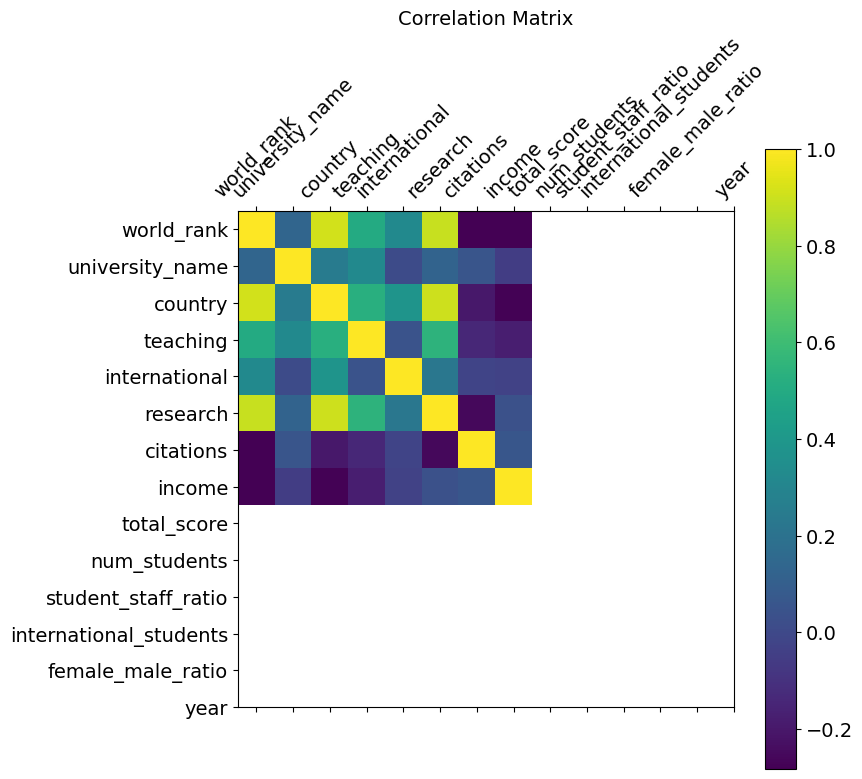

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df.corr(), fignum=f.number) # type of plot
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df.shape[1]), df.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

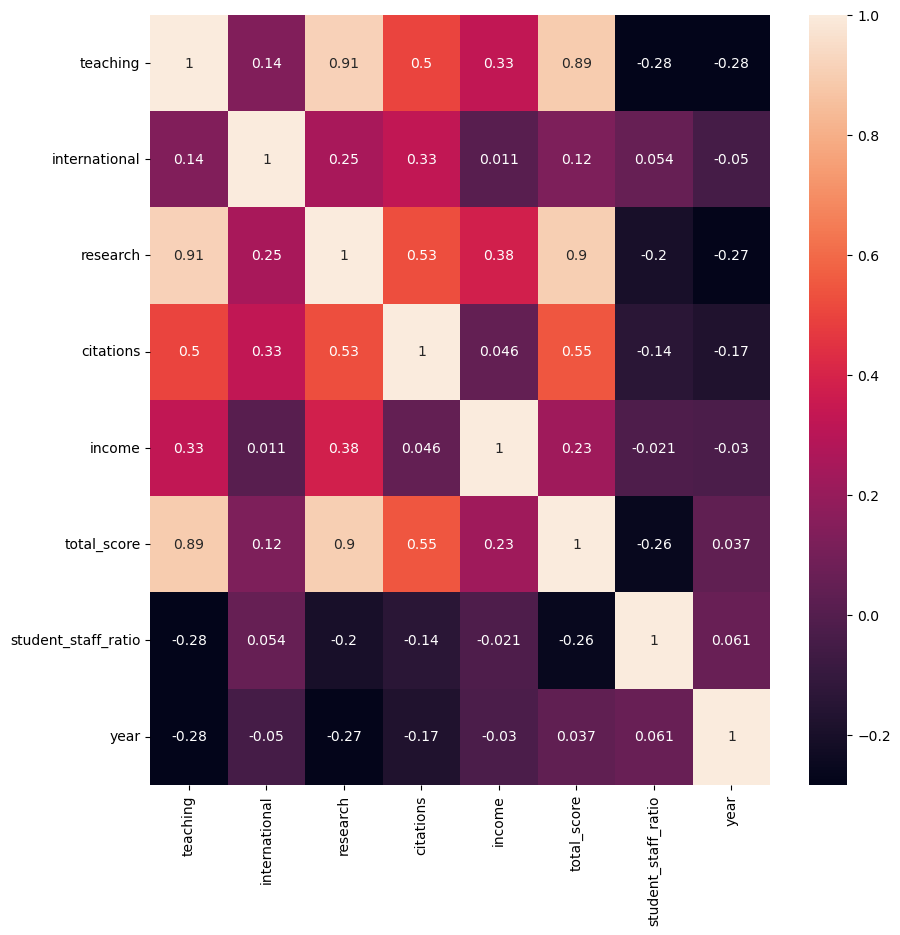

In [17]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df.corr(), annot = True, ax = ax)

#### b. Scatterplot

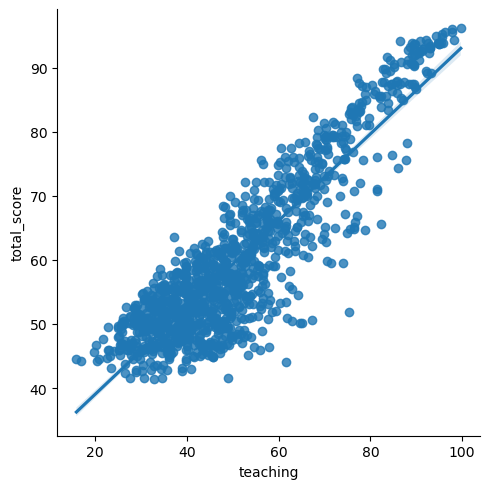

In [18]:
# Create a scatterplot for the "teaching" and "total_score" columns in seaborn
sns.lmplot(x = 'teaching', y = 'total_score', data = df)

#### c. Pair Plots

In [19]:
# Keep only the variables you want to use in the pair plot

sub = df[['teaching', 'international', 'research', 'citations', 'income', 'total_score']]

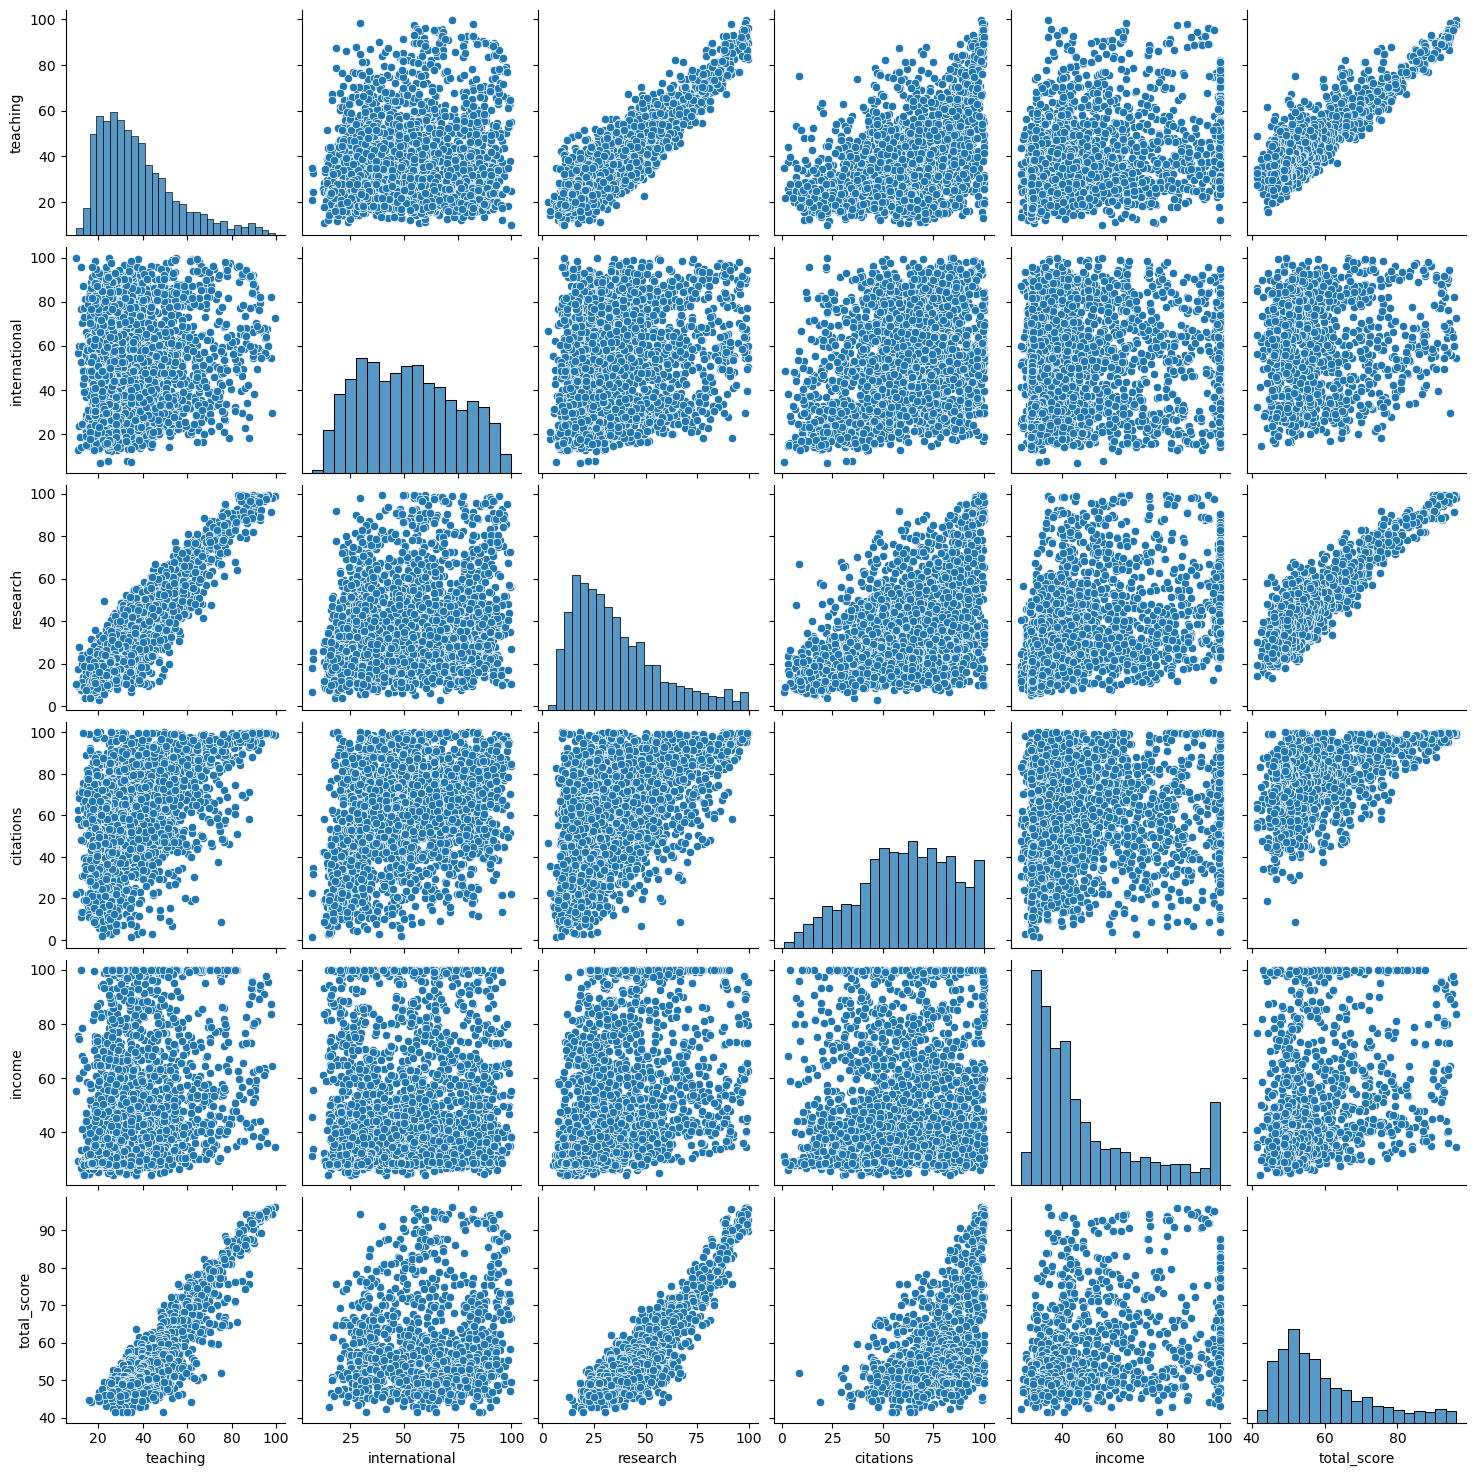

In [20]:
# Create a pair plot 

g = sns.pairplot(sub)

#### d. Categorical Plots:

<AxesSubplot:xlabel='total_score', ylabel='Count'>

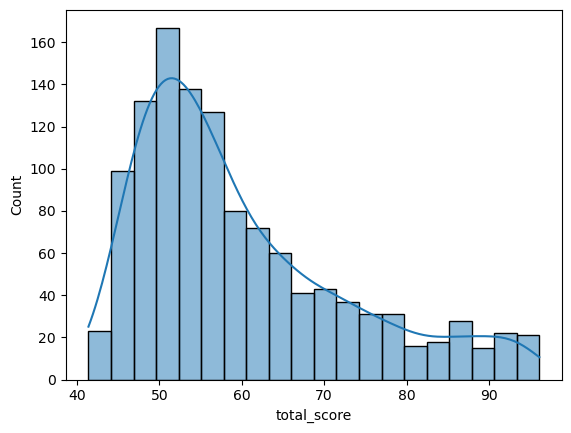

In [21]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the GDP per capita. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['total_score'], bins = 20, kde = True)

In [22]:
df.loc[df['total_score'] < 45, 'Score category'] = 'Low Score'

In [23]:
df.loc[(df['total_score'] >= 45) & (df['total_score'] < 60), 'Score category'] = 'Middle Score'

In [24]:
df.loc[df['total_score'] >= 60, 'Score category'] = 'High Score'

In [25]:
df['Score category'].value_counts(dropna = False)

NaN             1402
Middle Score     719
High Score       445
Low Score         37
Name: Score category, dtype: int64

In [26]:
df.columns

Index(['world_rank', 'university_name', 'country', 'teaching', 'international',
       'research', 'citations', 'income', 'total_score', 'num_students',
       'student_staff_ratio', 'international_students', 'female_male_ratio',
       'year', 'Score category'],
      dtype='object')

In [ ]:
# Create a categorical plot in seaborn using the categories created above

sns.set(style="ticks")
g = sns.catplot(x="teaching", y="total_score", hue="Score category", data=df)

### Hypothesis

Worlds best universities are located within the United States of America.